# Initialize weights in Deep Learning

## Question 1

In [ ]:
# import libaraies
import torch
from torch import nn
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from torchvision.transforms.transforms import InterpolationMode

In [ ]:
!pip install -q torchmetrics
from torchmetrics.classification import MulticlassAccuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 14.3 MB/s eta 0:00:00


In [ ]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# prepare augmentation
# Create training transform with RandomRotation and gaussion noise augmentation
train_transform_trivial_augment = transforms.Compose([
    transforms.RandomRotation(10, interpolation = InterpolationMode.NEAREST, expand = False),
    transforms.GaussianBlur(kernel_size = 3, sigma = 0.3),
    transforms.ToTensor() 
])

# Create training transform (no data augmentation)
train_transform = transforms.Compose([
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
# get datasets
train_data = CIFAR10(root = 'data', train = True, transform = train_transform, download = True) 
train_data_aug = CIFAR10(root = 'data', train = True, transform = train_transform_trivial_augment, download = True)
test_data = CIFAR10(root = 'data', train = False, transform = test_transform, download = True)
# test_data_aug = CIFAR10(root = 'data', train = False, transform = train_transform_trivial_augment, download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# type(train_data)
train_data[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

## Get only even class data

In [ ]:
train_list = []
train_aug_list = []
test_list = []


for i, (x,y) in enumerate(train_data):
  if y % 2 == 0:
    train_list.append(train_data[i])
  # print(train_data[i])
  # break
for i, (x,y) in enumerate(train_data_aug):
  if y % 2 == 0:
    train_aug_list.append(train_data_aug[i])

for x,y in test_data:
  if y % 2 == 0:
    test_list.append((x, y))

len(train_list), len(train_aug_list), len(test_list)

(25000, 25000, 5000)

In [ ]:
# new_train = torch.utils.data.ConcatDataset(train_list)
# # type(new_train)
# len(test_list)
# test_list[:2]

In [ ]:
# concate datasets
new_train_data = torch.utils.data.ConcatDataset((train_list, train_aug_list))
new_test_data = torch.utils.data.ConcatDataset([test_list])

In [ ]:
# # # type(train_data)
# for i in new_test_data:
#   print(i)
#   break

In [ ]:
len(new_test_data)

5000

In [ ]:
# for i in new_train_data:
#   print(i)
#   break

In [ ]:
# # new_train_data[60000]
# for i, (x, y) in enumerate(new_train_data):
#   # print(x)
#   # print(type(y))
#   # break
#   if y % 2 != 0:
#     new_train_data.remove(i)

In [ ]:
len(new_train_data), len(new_test_data)

(50000, 5000)

In [ ]:
# for i in new_test_data:
#   print(i)

In [ ]:
# fit dataset in Dataloader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = new_train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

print(f"total {len(train_dataloader)} train data loader of each {BATCH_SIZE} batch size")
print(f"total {len(test_dataloader)} test data loader of each {BATCH_SIZE} batch size")

total 1563 train data loader of each 32 batch size
total 313 test data loader of each 32 batch size


In [ ]:
for i in range(len(train_data.classes)):
  if i % 2 == 0:
    print(train_data.classes[i])
  # print(i)

airplane
bird
deer
frog
ship


In [ ]:
# class name
class_names = [train_data.classes[i] for i in range(len(train_data.classes)) if i % 2 == 0] 
class_names

['airplane', 'bird', 'deer', 'frog', 'ship']

In [ ]:
# give index to class
class_idx = train_data.class_to_idx
class_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

## Visulize Data

image shape: torch.Size([3, 32, 32])


<ipython-input-20-a8ac2b9fe262>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(image.T.squeeze())


Text(0.5, 1.0, 'frog')

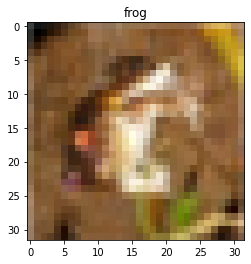

In [ ]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.T.squeeze())
plt.title(class_names[label//2])

In [ ]:
# look the size and shape of dataloader
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Text(0.5, 1.0, 'bird')

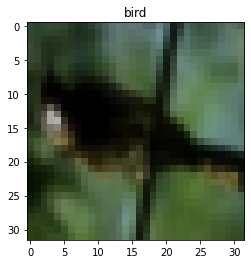

In [ ]:
# image from dataloader
torch.manual_seed(64)

random_idx = torch.randint(0, len(train_feature_batch), size = [1]).item()
image, label = train_feature_batch[random_idx], train_label_batch[random_idx]
plt.imshow(image.T.squeeze())
plt.title(class_names[label//2])

## Building model

In [ ]:
from torch.nn.modules.activation import Tanh
# base modle
class CNNCIFAR10(nn.Module):
  def __init__(self, input_channel: int, output_channel: int, hidden_node: int, output_nodes: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh()
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = output_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh()
    )

    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = output_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh()
    )

    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = output_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh()
    )

    self.conv_block_5 = nn.Sequential(
        nn.Conv2d(in_channels = output_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh()
    )

    self.conv_block_6 = nn.Sequential(
        nn.Conv2d(in_channels = output_channel, out_channels = output_channel, kernel_size = 5, stride = 1, padding = 2),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size = 3, stride = 1)
    )

    self.fc1_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = output_channel*30*30, out_features = hidden_node),
        nn.Tanh(),
        nn.Linear(in_features = hidden_node, out_features = output_nodes)
    )

  def forward(self, x):
    conv_x =  self.conv_block_6(self.conv_block_5(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))))
    # print(f"conv_x shape: {conv_x.shape}")
    return self.fc1_layer(conv_x)



base_model = CNNCIFAR10(input_channel = 3, output_channel = 12, hidden_node = 8, output_nodes = len(class_names)).to(device)
base_model

CNNCIFAR10(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
  )
  (conv_block_2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
  )
  (conv_block_3): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
  )
  (conv_block_4): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
  )
  (conv_block_5): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
  )
  (conv_block_6): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=3, stride=1, padding=0)
  )
  (fc1_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10800, out_features=8, bias=True)
    (2): Tanh()
    (3): Linear(in_features=8, out_fe

In [ ]:
base_model.__class__.__name__

'CNNCIFAR10'

In [ ]:
# base_model.__class__.__name__.find('BatchNorm'), base_model.__class__.__name__.find('Tanh')

## Xavier Initialization

In [ ]:
# custom weights initialization called on netG and netD
# def weights_init(m):
#     classname = m.__class__.__name__
#     if classname.find('Conv') != -1:
#         torch.nn.init.normal_(m.weight, 0.0, 0.02)
#     elif classname.find('Linear') != -1:
#         torch.nn.init.normal_(m.weight, 1.0, 0.02)
#         torch.nn.init.zeros_(m.bias)
def weights_init(c_name):
    if isinstance(c_name, nn.Conv2d):
        torch.nn.init.xavier_uniform_(c_name.weight)
        torch.nn.init.zeros_(c_name.bias)
    elif isinstance(c_name, nn.Linear):
        torch.nn.init.xavier_uniform_(c_name.weight)
        torch.nn.init.zeros_(c_name.bias)

## Loss and Accuracy Fuction

In [ ]:
# loss
loss_fn = nn.CrossEntropyLoss()

# accuracy_fn
accuracy_fn = MulticlassAccuracy(num_classes = len(class_names)).to(device)

## Train and Test loop

In [ ]:
# train
def train_loop(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, 
               accuracy_fn, device: torch.device = device):
  
  train_loss, train_acc = 0, 0

  for batch, (x_train, y_train) in enumerate(dataloader):

    if device == 'cuda':
      x_train, y_train = x_train.to(device), y_train.to(device)

    model.train()
    y_train = y_train // 2
    # 1. Forward
    y_pred = model(x_train)

    # 2. Loss
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_train, torch.argmax(y_pred, dim = 1))
    train_loss += loss
    train_acc += acc

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc


def test_loop(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for x_test, y_test in dataloader:
      if device == 'cuda':
        x_test, y_test = x_test.to(device), y_test.to(device)

      y_test = y_test // 2
      # 1. Forward
      test_pred = model(x_test)

      # 2. Loss
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, torch.argmax(test_pred, dim = 1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  return test_loss, test_acc


## Loss and Accuracy plot vs Epoch

In [ ]:
def plotplot(train_losses, test_losses, train_acces, test_acces):
  plt.figure(figsize = (25,8))
  # plt.plot(range(1, epoches*(len(train_dataloader)*BATCH_SIZE) + 1), train)
  plt.subplot(1,2,1)
  plt.plot(range(len(train_losses)),train_losses, label = "Train Loss")
  plt.plot(range(len(test_losses)),test_losses, label = "Test Loss")
  plt.xlabel("Epoches")
  plt.ylabel("Loss")
  plt.title("Loss vs Epoches")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(range(len(train_acces)),train_acces, label = "Train Accuracy")
  plt.plot(range(len(test_acces)),test_acces, label = "Test Accuracy")
  plt.xlabel("Epoches")
  plt.ylabel("Accuracy")
  plt.title("Accuracy vs Epoches")
  plt.legend()

  plt.show()

In [ ]:
torch.manual_seed(64)
torch.cuda.manual_seed(64)
cnn_cifar = CNNCIFAR10(input_channel = 3, output_channel = 12, hidden_node = 512, output_nodes = len(class_names)).to(device)

# initialize Xavier weights
cnn_cifar.apply(weights_init)

# optimizer function
optimizer = torch.optim.SGD(params = cnn_cifar.parameters(), lr = 0.01)


train_losses, test_losses = [], []
train_acces, test_acces = [], []

# train model
epoches = 10

torch.manual_seed(64)
torch.cuda.manual_seed(64)
for epoch in tqdm(range(epoches)):
  train_loss, train_acc = train_loop(model = cnn_cifar, dataloader = train_dataloader,
                                     loss_fn = loss_fn, optimizer = optimizer, 
                                     accuracy_fn = accuracy_fn, device = device)
  test_loss, test_acc = test_loop(model = cnn_cifar, dataloader = test_dataloader,
                                  loss_fn = loss_fn, accuracy_fn = accuracy_fn,
                                  device = device)
  print(f"Epoch: {epoch + 1}  Train Loss: {train_loss:.4f} / Test Loss: {test_loss:.4f} -/- Train Accuracy: {train_acc:.4f} / Test Accuracy: {test_acc:.4f}")

  train_losses.append(train_loss.item())
  test_losses.append(test_loss.item())
  train_acces.append(train_acc.item())
  test_acces.append(test_acc.item())

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1  Train Loss: 1.1854 / Test Loss: 1.4614 -/- Train Accuracy: 0.5118 / Test Accuracy: 0.3949
Epoch: 2  Train Loss: 1.0709 / Test Loss: 1.5576 -/- Train Accuracy: 0.5694 / Test Accuracy: 0.4095
Epoch: 3  Train Loss: 0.9717 / Test Loss: 1.5241 -/- Train Accuracy: 0.6166 / Test Accuracy: 0.4255
Epoch: 4  Train Loss: 0.8527 / Test Loss: 1.5175 -/- Train Accuracy: 0.6691 / Test Accuracy: 0.4708
Epoch: 5  Train Loss: 0.7420 / Test Loss: 1.5206 -/- Train Accuracy: 0.7142 / Test Accuracy: 0.4951
Epoch: 6  Train Loss: 0.6466 / Test Loss: 1.5202 -/- Train Accuracy: 0.7545 / Test Accuracy: 0.4918
Epoch: 7  Train Loss: 0.5530 / Test Loss: 1.6105 -/- Train Accuracy: 0.7925 / Test Accuracy: 0.5113
Epoch: 8  Train Loss: 0.4620 / Test Loss: 1.6297 -/- Train Accuracy: 0.8335 / Test Accuracy: 0.5006
Epoch: 9  Train Loss: 0.3701 / Test Loss: 1.7420 -/- Train Accuracy: 0.8688 / Test Accuracy: 0.5057
Epoch: 10  Train Loss: 0.2842 / Test Loss: 1.8120 -/- Train Accuracy: 0.9049 / Test Accuracy: 0.5210

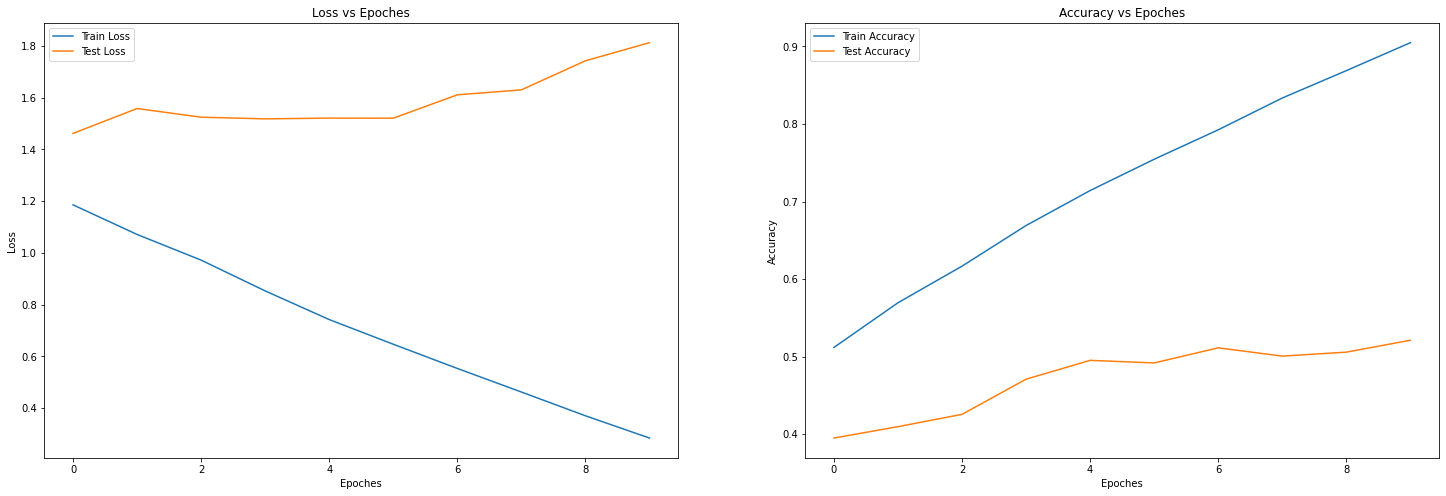

In [ ]:
plotplot(train_losses, test_losses, train_acces, test_acces)
# train_losses